<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-cell----run-this-first!" data-toc-modified-id="Initialization-cell----run-this-first!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization cell -- run this first!</a></span></li><li><span><a href="#Low-rank-matrices" data-toc-modified-id="Low-rank-matrices-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Low rank matrices</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Spotting-low-rank-matrices" data-toc-modified-id="Exercise:-Spotting-low-rank-matrices-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise: Spotting low-rank matrices</a></span></li><li><span><a href="#Spotting-an-induced--rank-one-matrix" data-toc-modified-id="Spotting-an-induced--rank-one-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spotting an <em>induced</em>  rank one matrix</a></span></li></ul></li><li><span><a href="#Application:-Background-subtraction-using-the-SVD" data-toc-modified-id="Application:-Background-subtraction-using-the-SVD-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Application: Background subtraction using the SVD</a></span><ul class="toc-item"><li><span><a href="#Decomposing-the-movie-matrix-with-the-SVD" data-toc-modified-id="Decomposing-the-movie-matrix-with-the-SVD-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decomposing the movie matrix with the SVD</a></span></li><li><span><a href="#What-information-do-the-right-singular-vectors-represent?" data-toc-modified-id="What-information-do-the-right-singular-vectors-represent?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>What information do the right singular vectors represent?</a></span></li><li><span><a href="#The-low-rank-matrix-hiding-inside-the-video" data-toc-modified-id="The-low-rank-matrix-hiding-inside-the-video-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The low-rank matrix hiding inside the video</a></span></li></ul></li></ul></div>

# Initialization cell -- run this first!

In [39]:
using Colors, Interact, Plots
gr()

# deps.jl containts some plotting utilites and an important
# workaround for yflip=:true not working in GR v17.2 
# You can inspect the file deps.jl to learn more
include("deps.jl"); 

# Low rank matrices  

A set of vectors is said to be *linearly dependent* if one of the vectors in the set can be defined as a linear combination of the others; if no vector in the set can be written as a linear combination of the others, then the vectors are said to be *linearly independent*.

Concretely, suppose $a_1, \ldots, a_n$ are a set of vectors then they are considered to be linearly dependent if there exist scalars $\alpha_1, \ldots, \alpha_n$ not all zero such that

\begin{equation}\label{eq:li}
 \alpha_1 a_1 + \ldots + \alpha_n a_n = 0.
\end{equation}

Otherwise they are linearly independent. This  is equivalent to saying that the if the vectors are linearly independent, then the only way to satisfy Eq. (\ref{eq:li}) is to set $\alpha_1 = \ldots, \alpha_n = 0$.  



The **column rank** of an $m \times n$ matrix $A$ is the number of linearly independent column. 

The **row rank** of an $m \times n$ matrix $A$ is the number of linearly independent rows. 

A remarkable fact of linear algebra is that the number of linearly independent rows of a matrix equals the number of linearly indepenent columns.  Thus
\begin{equation}
r = \textrm{rank}(A) = \textrm{rank}(A^T) 
\end{equation}

Since the number of linear independent columns (or rows) cannot exceed the number of columns (or, resp., rows) in a matrix,  we can conclude that

\begin{equation}
r \leq \min(m,n).
\end{equation}



m

Consider the matrix 

$$ A= x y^T,$$

where $x$ is an $m$ dimensional vector and  

$$ y = \begin{bmatrix} y_{1} & \ldots & y_{n} \end{bmatrix}^T.$$

Consequently the matrix  $A$ can be written in column partition format as  

$$A = \begin{bmatrix}  y_1 x & \ldots & y_n x \end{bmatrix}.$$

We would like to determine the rank of $A$. 

Now suppose that $x_1$ and $x_2$ are linearly independent vectors and  

$$ A = x_1 y_1 ^T + x_2 y_2^T. $$

What is the rank of $A$?  Let us begin by examining the structure of $A$ -- as earlier, it can be expressed as

$$A = \begin{bmatrix}  y_{11} x_1 & \ldots & y_{1n} x_1 \end{bmatrix} + \begin{bmatrix}  y_{21} x_2 & \ldots & y_{2n} x_2 \end{bmatrix},$$

or equivalently

$$A = \begin{bmatrix}  y_{11} x_1 + y_{21} x_{2} & \ldots & y_{1n} x_{1} + y_{2n}x_{2}\end{bmatrix}.$$

We can now observe that every column of $A$ is a linear combination of two linearly independent vectors. Thus the rank of $A$ is at most two. 

Note now that 

$$A^T = y_1 x_1^T + y_2 x_2^T,$$

and so, via a similar argument we can see that the rank of $A$ also depends whether $y_1$ and $y_2$ are linearly independent. If they are linearly dependent (and not equal to zero) then the rank of $A^T$, and hence $A$ will equal $1$!

Being able spot low-rank matrices, via the dependency structure in the rows or columns is a valuable skill in data science, machine learning and computational mathematics.


## Exercise: Spotting low-rank matrices

The ability to spot low-rank matrices "in the wild" is a useful skill in computational data science and  applied mathematics.

We will now build up that muscle with some warm-up exerices :-)  

**Tip**

For the questions that follow,   express the matrix as $x y^T$ or $x_1 y_1^T + x_2 y_2^T$ and then examine the dependency structure of $x$'s and the $y$'s to deduce the rank of the matrix.

In [40]:
A = [ (1 <= j <= 10) || (25 <= j <= 35) ? 1 : 0  
    for i=1:100, j=1:100 ]
rank(A)
x =  ones(100)
y = [ones(10); zeros(14); ones(11); zeros(65)]
rank(A-x*y')

0

In [41]:
A = [ (1 <= j <= 10) || (25 <= j <= 35) ||  
    (40 <= i <= 60 && 50 <= j <= 70) ?  1 : 0  
    for i = 1:100, j=1:100 ]
x1 =  ones(100) 
y1 = [ (25 <= j <= 35) || (1 <= j <= 10) ? 1 : 0 for j = 1 : 100]
x2 =  [( 40 <= i <= 60) ? 1 : 0 for i = 1 : 100] 
y2 = [ 50 <= j <= 70 ? 1 : 0 for j = 1 : 100 ]
print(size(A), size(x1), size(x2), size(y1), size(y2))

rank(A-x1*y1'-x2*y2')

(100, 100)(100,)(100,)(100,)(100,)

0

Indeed! Let us check it just to verify.

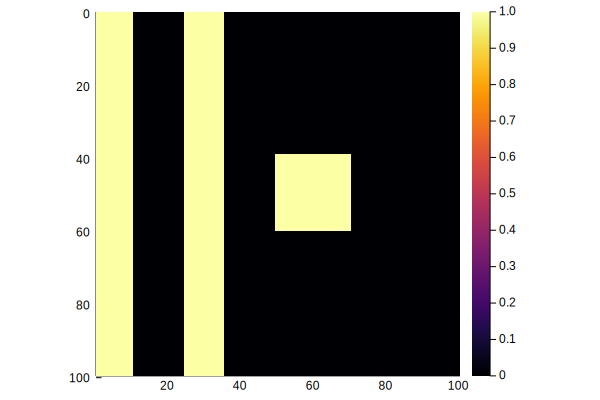

In [42]:
x1 = ones(100)
y1 = [(25 <= j <= 35) || (1 <= j <= 10) ? 1 : 0 for j=1:100]
x2 = [(40 <= i <= 60) ? 1 : 0 for i=1:100]
y2 = [50 <= j <= 70 ? 1 : 0 for j=1:100]
Aalt = x1*y1' + x2*y2'
displaymatrix(Aalt)

We can compute the Frobenius norm of the difference between the two matrices using the command `vecnorm` as in the next cell. 

In [43]:
vecnorm(A-Aalt)

0.0

A few more exercises and we will be ready for the main point of this section -- which is to use the SVD extract low-rank matrices!

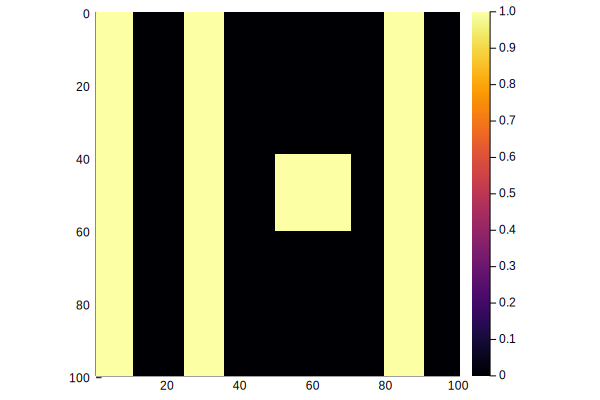

In [44]:
A = [(1 <= j <= 10) || (25 <= j <= 35) ||
    (40 <= i <= 60 && 50 <= j <= 70) || 
    (80 <= j <= 90) ? 1 : 0  
    for i=1:100, j=1:100]
displaymatrix(A)

Indeed! The matrix $A$ can be written as $x_1 y_1^T + x_2 y_2^T$. The $x_1$ and $x_2$ are same as earlier. Only the $y_1$ entry changes -- we add extra ones in the indices of the $y_1$ corresponding to the columns where the new "stripe" appears. 

Now consider the matrix in the following cell. 

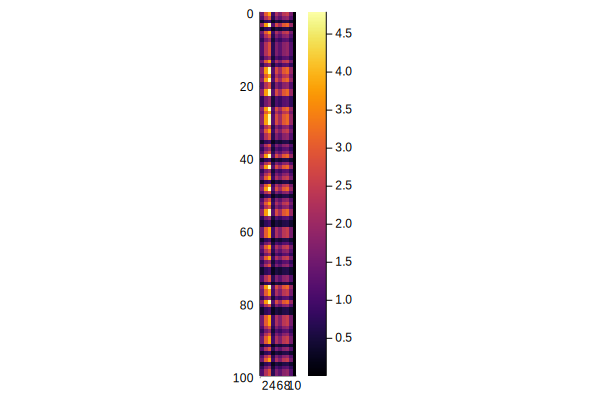

In [45]:
x = rand(1:5, 100)
y = rand(1, 100)
A = [ y[j]*x[i] for i=1:100, j=1:10 ]
displaymatrix(A)

## Spotting an *induced*  rank one matrix

Consider the matrix $B$ in the following cell. It is obtained by concatenating copies of the the matrix $X$ alongside each other. 


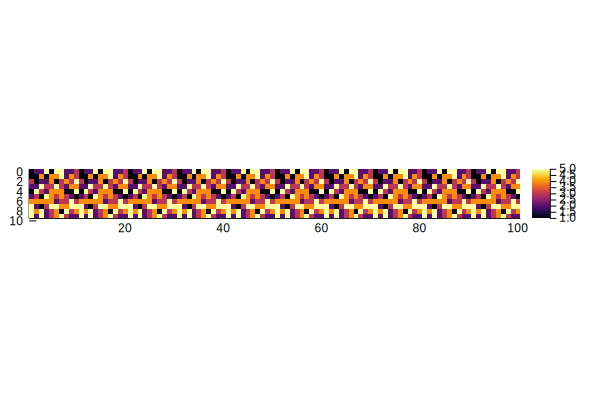

In [46]:
X = rand(1:5, 10, 10)
B = repmat(X, 1, 10)
displaymatrix(B)

The columns of $X$ are drawn at random -- so generically (with very high probability) the rank of $X$ will equal the number of columns. Thus, the matrix $B$ as  generated, will have as many linearly independent columns as the number of linearly independent columns of $X$. 

However, let us consider the matrix $A$ formed as in the next cell. 

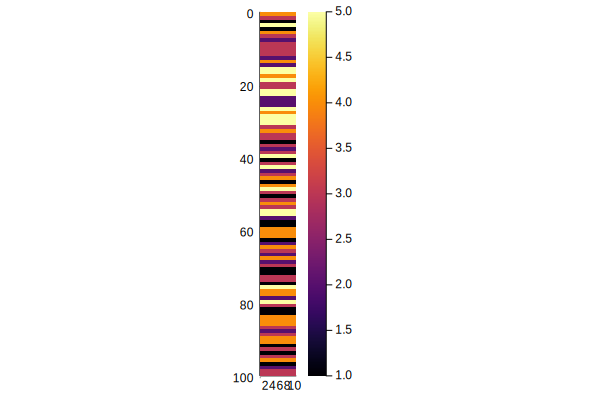

In [47]:
A = repmat(x[:], 1, 10)
displaymatrix(A)

In this case, even though the matrix $B$ did not have rank one, we **induced a low rank matrix** $A$ by reshaping the elements of $B$ in an appropriate manner. This will be an important ingredient in understanding why and application of the singular value decomposition (SVD) that we shall describe next "works" that way it does. 

# Application: Background subtraction using the SVD

We will now describe an application of the SVD that utilizes its ability to decompose a matrix into a sum of as many  rank one outer-product matrices as the rank of the matrix.

We will illustrate the application with a video dataset. Let us load a video which is stored as a `.mat` file. The command `matread` produces a Dictionary of the variables in the `.mat` file. 

In [48]:
# this the package we can use to read MATLAB formated .mat files
using MAT
vars = matread("lobby.mat") 

Dict{String,Any} with 1 entry:
  "MovMat" => [0.345098 0.341176 … 0.262745 0.258824; 0.447059 0.443137 … 0.325…

The command `matopen` is  used to open a `.mat` formatted file. The `read` command, as used in the next cell, loads the variable specified by `varname` into the namespace. 

In [49]:
# TODO: Fill in the ?? with the appropriate variable name from 
# the Dictionary
varname = "MovMat"
file = matopen("lobby.mat")
MovMat = read(file, varname) 
close(file)
@show size(MovMat)
@show typeof(MovMat)

size(MovMat) = (128, 160, 650)
typeof(MovMat) = Array{Float64,3}


Array{Float64,3}

The `MovMat` datacube is composed of 650 frames of a video where each frame is a 128 x 160 image. We will scale the elements of the `MovMat` datacube so that they lie between 0 and 1 as in the next cell and display the first frame of this video. 

In [50]:
# Convert to [0, 1] floating point, if necessary
MovMat = float(MovMat)
MovMat -= minimum(MovMat)
MovMat /= maximum(MovMat)
# Display first frame
Gray.(MovMat[:, :, 1])

Use the cell below to explore different frames of the video

Interact.Textbox{Int64}(5: "input-2" = 100 Int64 , "frame", nothing, 100)

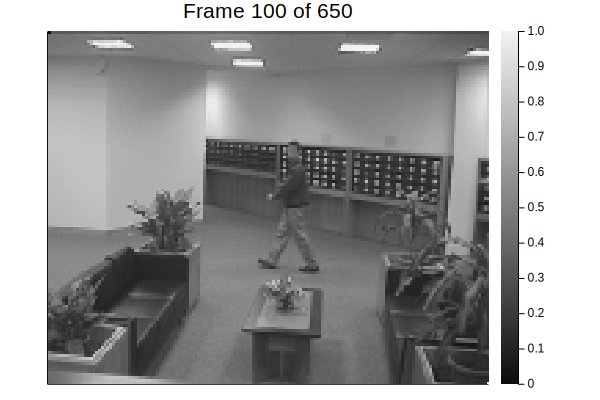

In [51]:
@manipulate for frame = 100 
    plotframe(
        bg(MovMat[:, :, frame]),
        title = "Frame $frame of $(size(MovMat,3))",
    )
end

# Enter values in the box below to explore the video

Let us now play the matrix as a movie

In [54]:
# this is a package built & tested for bookalive that 
# cannot be added locally (for now)
using WebPlayer

In [55]:
playvideo([bg(MovMat)], "Original movie", 
    frames_per_second=120, width=200)
# move the slider to scan through the movie

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (WebIO.Widget("context-9", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_05", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_06", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"O\",1,val,650)})")]))):
      (button { id="button" events=Dict("click"=>WebIO.JSString("(function (){var tnorm=function set_play(name, nvideos, fps, nframes, init, callback){\n    var video;\n    var button = document.getElementById(\"button\");\n\n    for(var i = 1; i <= nvideos; i++){\n        video = document.getElementById(name + i);\n        if(video.paused){\n            video.play();\n            if(!init){\n                if(i == 1 && !init){\n                    video.addEventListener('ended', callback);\n                }\n                var new_rate = (video.duration / nframes) / (1.0 / fps);\n                video.playbackRate = new_rate;\n            }\n            button.textContent = \" ⏸ \";\n\n        }else{\n            video.pause();\n            button.textContent = \" ▶ \";\n        }\n    }\n    return video.currentTime / video.duration;\n}\n(\"O\",1,120,650,WebIO.getval({\"name\":\"initialized\",\"id\":\"ob_06\",\"context\":\"context-9\",\"type\":\"observable\"}),(function (){var button=document.getElementById(\"button\"); button.textContent=\" ▶ \"; return WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_05\",\"context\":\"context-9\",\"type\":\"observable\"},1)})); WebIO.setval({\"name\":\"initialized\",\"id\":\"ob_06\",\"context\":\"context-9\",\"type\":\"observable\"},false); WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_05\",\"context\":\"context-9\",\"type\":\"observable\"},Math.round((650*tnorm))); return })")) }
        " ▶ "))
    (div { style=Dict(:padding=>"0.5em",:width=>"400px") }
      (div)))
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict(:outline=>"1px solid #555",:padding=>"0.5em") }
      (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
        (div
          "Original movie")
        (div { style=Dict(:width=>"200") }
          (WebIO.Widget("context-9", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_05", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_06", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"O\",1,val,650)})")]))):
            (video { attributes=Dict{Any,Any}(Pair{Any,Any}(:width, "100%")) id="O1" }
              (source { attributes=Dict(:src=>"data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQABUnRt

## Decomposing the movie matrix with the SVD

We will now use the SVD to decompose the movie. The movie is stored as an $m \times n \times t$ 3-D array, where
+ $m$ is the number of rows of pixels in each frame,
+ $n$ is the number of columns of pixels in each frame, and
+ $t$ is the number of frames in the movie

To decompose using the SVD, we first reshape the movie array into an $mn \times t$ **matrix** $A$. Each column of the matrix corresponds to a frame (and contains $mn$ pixel values).

We then compute the rank $k$ truncated singular value decompositon of $A$.
In other words, if $A$ is rank $r$ and has SVD

$$A = \sum_{i=1}^{r} \sigma_i u_i v_i^T,$$

then $A_k$, the rank $k \leq r$ truncted SVD of $A$, is

$$A_k = \sum_{i=1}^{k} \sigma_i u_i v_i^T,$$

and $(A - A_k)$ is the residual matrix. We will compute the residual $(A-A_k)$ directly, but it is good to observe that it has SVD

$$ A - A_k = \sum_{i=1}^{r} \sigma_i u_i v_i^T - \sum_{i=1}^{k } \sigma_i u_i v_i^T = \sum_{i=k+1}^{r} \sigma_i u_i v_i^T.$$


In the cell below, write a function `svdize_moviematrix` that takes as input the $m \times n \times t$ movie and a rank $k$.
The function should
1. reshape the movie into an $mn \times t$ matrix
2. compute the truncated SVD and residual
3. reshape both truncated SVD and residual into $m \times n \times t$ arrays
4. return the reshaped truncated SVD, reshaped residuals, and singular values

**Hint 1:** Recall that the above sum of outer products is equivalent to
$$
  A_k = U_k*\Sigma_k*V_k^T
$$
where $U_k = [u_1 \cdots u_k]$ is a matrix of the first $k$ left singular vectors,
$V = [v_1 \cdots v_k]$ is a matrix of the first $k$ right singular vectors, and
$\Sigma = \operatorname{diagm}(\sigma_1,\dots,\sigma_k)$ is a diagonal matrix of the first $k$ singular values.

**Hint 2:** The matrices $U_k$, $\Sigma_k$ and $V_k$ can be obtained using `svds` as
```julia
  UsV = svds(A,nsv=k)[1]
  Uk = UsV[:U]
  sk = UsV[:S]
  Vk = UsV[:V]
```

In [56]:
"""
    MovMatk, MovMatResidual, Vk, sk = svdize_moviematrix(MovMat, k)
Inputs:
* `MovMat` is an m x n x numFrames array
* `k` is an integer
Outputs:
* `MovMatk` is an m x n x numFrames 3-D array
* `MovMatResidual` is an m x n x numFrames 3-D array
* `sk` is a length k vector

Given a movie `MovMat` formatted as a 3-D array and a rank `k`,
return a (rank `k`) truncated SVD version of the movie as `MovMatk`,
the resiudal as `MovMatResidual`, the right singular vectors as `Vk`,
and the singular values as `sk`.

*Hint: svds has a keyword argument `nsv` for the number of singular values.
To specify this argument, you use the keyword: `svds(..., nsv=...)`*
"""
function svdize_moviematrix(MovMat, k)
        # Reshape 3-D arrays into matrix where each column is a frame
        m, n, numFrames = size(MovMat) # MovMat is an m x n x numFrames 3-D array
        MovMatVec = reshape(MovMat, m*n, numFrames) # Convert it to a mn x numFrames matrix

        # Compute rank k truncated SVD and residual
        UsV = svds(MovMatVec,nsv=k)[1]
        Uk = UsV[:U]
        sk = UsV[:S]
        Vk = UsV[:V]

        MovMatk = Uk*Diagonal(sk)*transpose(Vk)
        MovMatResidual =  MovMatVec - MovMatk

        # Reshape back into 3-D m x n x numFrames arrays
        MovMatk = reshape(MovMatk, m, n, numFrames)
        MovMatResidual = reshape(MovMatResidual, m, n, numFrames)

        return MovMatk, MovMatResidual, sk
end


svdize_moviematrix

What does the movie represented by $A_1$ look like? Let's find out! First we compute $A_1$ using the function we just defined. 

In [57]:
# Desired rank
k = 1
# Compute truncated SVD-version of movie
MovMatk, MovMatResidual,  _ = svdize_moviematrix(MovMat, k)
m, n, num_frames = size(MovMat)

(128, 160, 650)

Done! Now let's examine the frames of the rank $k$ approximation! 

Interact.Textbox{Int64}(9: "input-3" = 325 Int64 , "frame", nothing, 325)

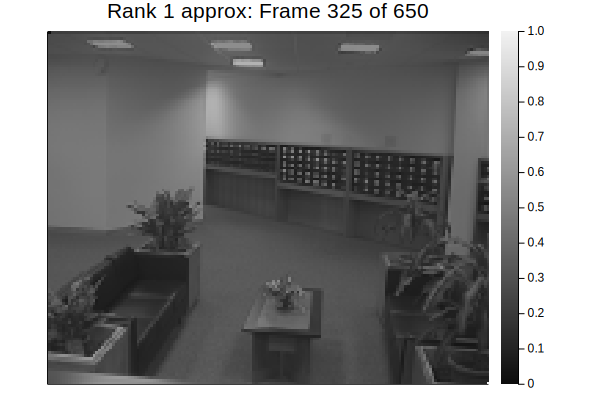

In [58]:
@manipulate for frame=325
    plotframe(
        bg(MovMatk[:, :, frame]),
        title = "Rank $k approx: Frame $frame of $(size(MovMat,3))",
    )
end

# Enter values in the box below to explore the video

Perhaps you're seeing that something unexpected (it was to me, too!) has happened. Let's see the original movie and the movie of the rank $k$ approximation side-by-side. 

In [59]:
playvideo([bg(MovMat), bg(MovMatk)], 
    ["Original movie","Rank $k approximation"], 
    frames_per_second=120, width=200)

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (WebIO.Widget("context-13", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_07", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_08", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"Original movie\",2,val,650)})")]))):
      (button { id="button" events=Dict("click"=>WebIO.JSString("(function (){var tnorm=function set_play(name, nvideos, fps, nframes, init, callback){\n    var video;\n    var button = document.getElementById(\"button\");\n\n    for(var i = 1; i <= nvideos; i++){\n        video = document.getElementById(name + i);\n        if(video.paused){\n            video.play();\n            if(!init){\n                if(i == 1 && !init){\n                    video.addEventListener('ended', callback);\n                }\n                var new_rate = (video.duration / nframes) / (1.0 / fps);\n                video.playbackRate = new_rate;\n            }\n            button.textContent = \" ⏸ \";\n\n        }else{\n            video.pause();\n            button.textContent = \" ▶ \";\n        }\n    }\n    return video.currentTime / video.duration;\n}\n(\"Original movie\",2,120,650,WebIO.getval({\"name\":\"initialized\",\"id\":\"ob_08\",\"context\":\"context-13\",\"type\":\"observable\"}),(function (){var button=document.getElementById(\"button\"); button.textContent=\" ▶ \"; return WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_07\",\"context\":\"context-13\",\"type\":\"observable\"},1)})); WebIO.setval({\"name\":\"initialized\",\"id\":\"ob_08\",\"context\":\"context-13\",\"type\":\"observable\"},false); WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_07\",\"context\":\"context-13\",\"type\":\"observable\"},Math.round((650*tnorm))); return })")) }
        " ▶ "))
    (div { style=Dict(:padding=>"0.5em",:width=>"400px") }
      (div)))
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict(:outline=>"1px solid #555",:padding=>"0.5em") }
      (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
        (div
          "Original movie")
        (div { style=Dict(:width=>"200") }
          (WebIO.Widget("context-13", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_07", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_08", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"Original movie\",2,val,650)})")]))):
            (video { attributes=Dict{Any,Any}(Pair{Any,Any}(:width, "100%")) id="Original movie1" }
              (source { attributes=Dict(:src=>"data:video/mp4;base64,AA

Where did the people go?? Shall we see the movie, the rank $k$ approximation and the residual side-by-side? 

Where did the people go? Let us examine the residual matrix - after all `MovMat = MovMatk + MovMatResidual`!

In [60]:
playvideo([bg(MovMatk), fg(MovMatResidual), bg(MovMat)], 
    ["Rank $k approximation","Residual","Original Movie"], 
    frames_per_second=120, width=200)

(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (WebIO.Widget("context-17", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_09", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_10", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"Rank 1 approximation\",3,val,650)})")]))):
      (button { id="button" events=Dict("click"=>WebIO.JSString("(function (){var tnorm=function set_play(name, nvideos, fps, nframes, init, callback){\n    var video;\n    var button = document.getElementById(\"button\");\n\n    for(var i = 1; i <= nvideos; i++){\n        video = document.getElementById(name + i);\n        if(video.paused){\n            video.play();\n            if(!init){\n                if(i == 1 && !init){\n                    video.addEventListener('ended', callback);\n                }\n                var new_rate = (video.duration / nframes) / (1.0 / fps);\n                video.playbackRate = new_rate;\n            }\n            button.textContent = \" ⏸ \";\n\n        }else{\n            video.pause();\n            button.textContent = \" ▶ \";\n        }\n    }\n    return video.currentTime / video.duration;\n}\n(\"Rank 1 approximation\",3,120,650,WebIO.getval({\"name\":\"initialized\",\"id\":\"ob_10\",\"context\":\"context-17\",\"type\":\"observable\"}),(function (){var button=document.getElementById(\"button\"); button.textContent=\" ▶ \"; return WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_09\",\"context\":\"context-17\",\"type\":\"observable\"},1)})); WebIO.setval({\"name\":\"initialized\",\"id\":\"ob_10\",\"context\":\"context-17\",\"type\":\"observable\"},false); WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_09\",\"context\":\"context-17\",\"type\":\"observable\"},Math.round((650*tnorm))); return })")) }
        " ▶ "))
    (div { style=Dict(:padding=>"0.5em",:width=>"400px") }
      (div)))
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict(:outline=>"1px solid #555",:padding=>"0.5em") }
      (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
        (div
          "Rank 1 approximation")
        (div { style=Dict(:width=>"200") }
          (WebIO.Widget("context-17", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_09", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_10", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"Rank 1 approximation\",3,val,650)})")]))):
            (video { attributes=Dict{Any,Any}(Pair{Any,Any}(:width, "100%")) id="Rank 1 approximation1" }
              (source { attributes=Dict(:

Let's take a closer look at a fixed frame in each movie

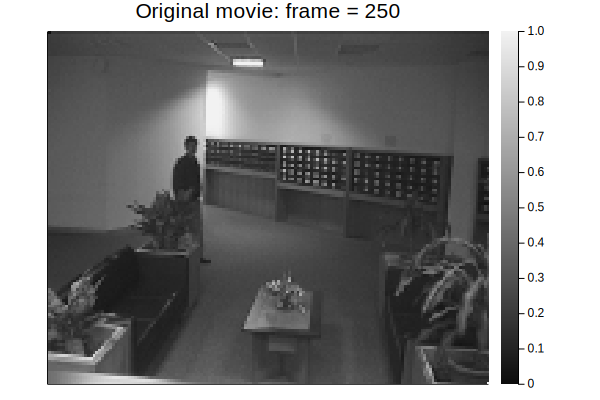

In [61]:
# An interesting frame to compare
frame = 250

# Original movie
plotframe(
    bg(MovMat[:, :, frame]),
    title = "Original movie: frame = $frame",
)

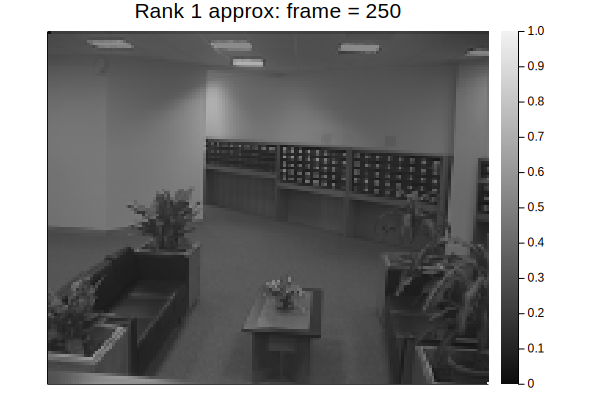

In [62]:
# Rank k approx
plotframe(
    bg(MovMatk[:, :, frame]),
    title = "Rank $k approx: frame = $frame",
)

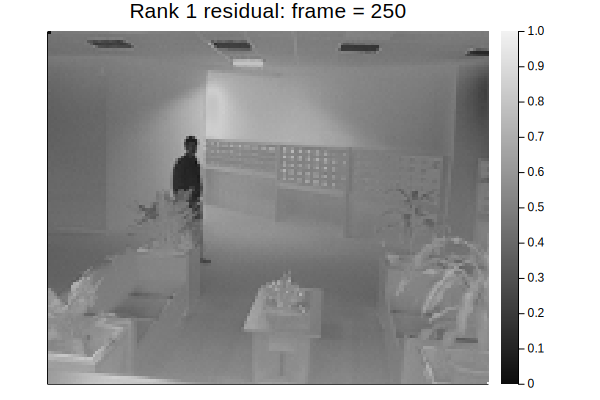

In [63]:
# Rank k residual
plotframe(
    fg(MovMatResidual[:, :, frame]),
    title = "Rank $k residual: frame = $frame",
)

$\underline{\textrm{Question}}$: What does the rank $1$ approximation of the movie capture? What does the residual capture? Describe and put some pictures into the document.



## What information do the right singular vectors represent? 

We will discuss why the rank 1 component captures the background in a bit. It has to do with the fact that there is a low rank matrix hiding inside the video, if we view things just right.  Recall that the SVD returns the left and right singular vectors. So we may deduce the structure  of the low rank matrix hiding inside this movie, let us first try to understand what the right singular vectors of this movie convey. That will give us the important clue for unlocking this puzzle - once we do, we'll start seeing (induced) low rank matrices (almost) everywhere!

We begin by examining first right singular vector, $V[:, 1]$, more closely.

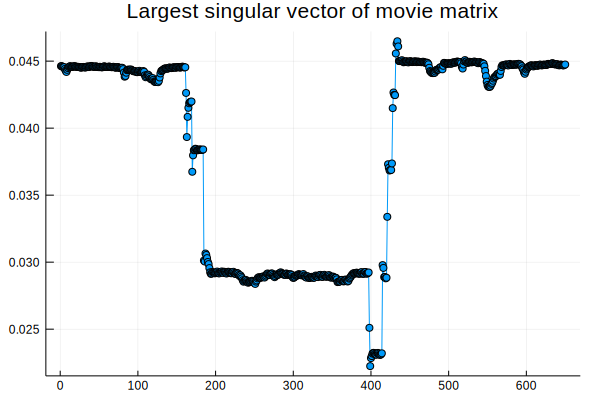

In [64]:
# Largest right singular vector
UsV = svds(reshape(MovMat, :, 650), nsv=1)[1]
V = UsV[:V]
plot(
    V[:, 1],
    linestyle=:solid,
    marker=:circle, # :circle
    label="V[:, 1]",
    title="Largest singular vector of movie matrix",
    legend=:bottomleft,
    label=""
)

Do you notice something unusual in the behavior around element 194 and near element 450? Recall that the $A$ matrix had as its rows pixel indices and time its columns. Thus the $V$'s encode the time behavior and hence its dimensions are exactly equal to the number of frames in the movie. Let us scroll through the movie one frame at a time to see if we can identify the physical phenomenon that occurs in the movie when the elements of $V[:,1]$ "jump" (up or down).

Interact.Options{:ToggleButtons,Int64}(13: "input-4" = 100 Int64 , "frame", 100, "100", 1, Interact.OptionDict(DataStructures.OrderedDict("100"=>100,"194"=>194,"397"=>397,"450"=>450), Dict(100=>"100",194=>"194",397=>"397",450=>"450")), Any[], Any[], true, "horizontal", true)

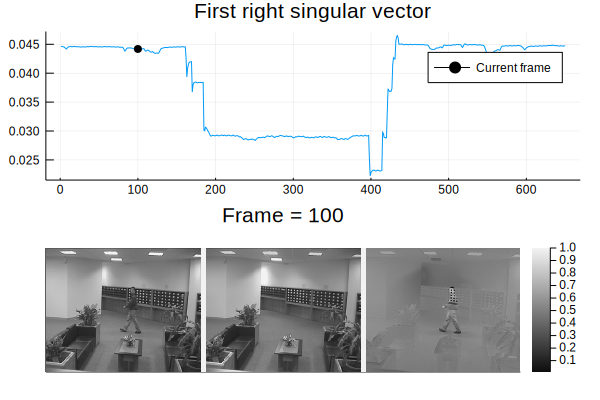

In [65]:
@manipulate for frame = [100, 194, 397, 450]    
    # Plot first right singular vector
    p1 = plot(
        V,
        linestyle=:solid,
        title="First right singular vector",
        label=""
    )
    
    # Denote current frame
    plot!(
        (frame, V[frame, 1]),
        marker=:circle, # current point
        color=:black,
        label="Current frame"
    )

    # Plot movie frames
    p2 = plotframe(
        joinframes(
            frame,
            bg(MovMat),
            bg(MovMatk),
            fg(MovMatResidual),
        ),
        title = "Frame = $frame",
    )
    
    plot(p1, p2,
        layout = Plots.grid(2, 1, heights=[0.5, 0.5]),
    )
end

# Change frame to view different frames

The right singular vector is encoding the "on-off-on" time behavior of the front row of lights. Note the all the elements of $V[:,1]$ are positive though. So the "off" portion does not correspond to 0 in the approriate segment of the vector.   

Let us now compare the low rank decompositions obtained by setting  $k = 1$ versus $k = 2$, as in the next cell. When $k =2$, we will also plot $V[:,2]$ and try to understand what that captures. 


Interact.Options{:ToggleButtons,Int64}(17: "input-5" = 1 Int64 , "k", 1, "1", 1, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2), Dict(2=>"2",1=>"1")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Int64}(19: "input-6" = 100 Int64 , "frame", 100, "100", 1, Interact.OptionDict(DataStructures.OrderedDict("100"=>100,"194"=>194,"397"=>397,"450"=>450), Dict(100=>"100",194=>"194",397=>"397",450=>"450")), Any[], Any[], true, "horizontal", true)

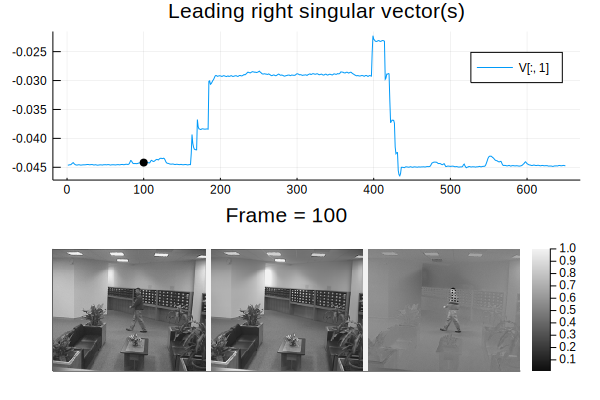

In [66]:
@manipulate for k=[1, 2], frame=[100, 194, 397, 450] 
    # Decompose movie
    _backk, _resk = svdize_moviematrix(MovMat, k)
    UsV = svds(reshape(MovMat, :, 650), nsv=k)[1]
    _Vk = UsV[:V]

    # Plot right singular vector(s)
    p1 = plot(
        _Vk,
        linestyle=:solid,
        title="Leading right singular vector(s)",
        label=["V[:, 1]", "V[:, 2]"]
    )
    
    # Denote current frame
    for kk = 1:k
        plot!(
            (frame, _Vk[frame, kk]),
            marker=:circle, # current point
            color=:black,
            label=""
        )
    end
    
    # Plot movie frames
    p2 = plotframe(
        joinframes(
            frame,
            bg(MovMat),
            bg(_backk),
            fg(_resk),
        ),
        title="Frame = $frame",
    )
    
    plot(p1, p2,
        layout = Plots.grid(2, 1, heights=[0.5, 0.5]),
    )
end

# Change k to use a different rank approximation
# Change frame to view different frames

And now let us plot the individual frames of the decomposition for $k = 2$.

In [68]:
# Choose rank
k = 2

# Decompose movie
MovMatk, MovMatResidual = svdize_moviematrix(MovMat, k);
UsV = svds(reshape(MovMat,:,650), nsv=k)[1]
V = UsV[:V];

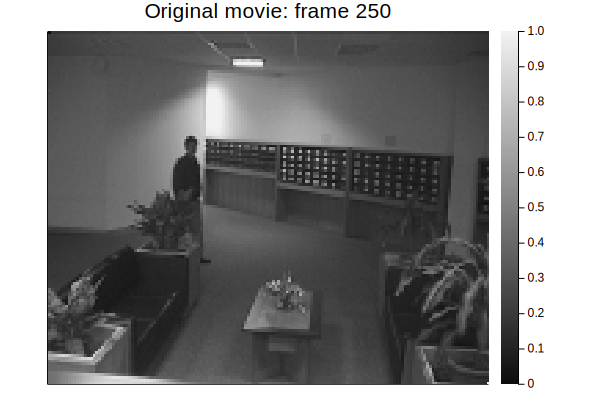

In [70]:
# An interesting frame
frame = 250

# Original movie
plotframe(
    bg(MovMat[:, :, frame]),
    title="Original movie: frame $frame",
)

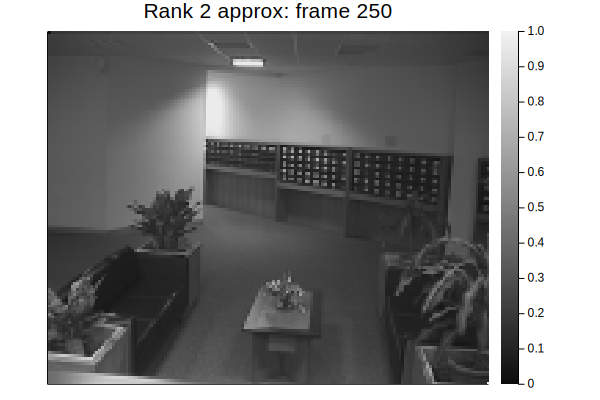

In [71]:
# Rank k approx
plotframe(
    bg(MovMatk[:, :, frame]),
    title="Rank $k approx: frame $frame",
)

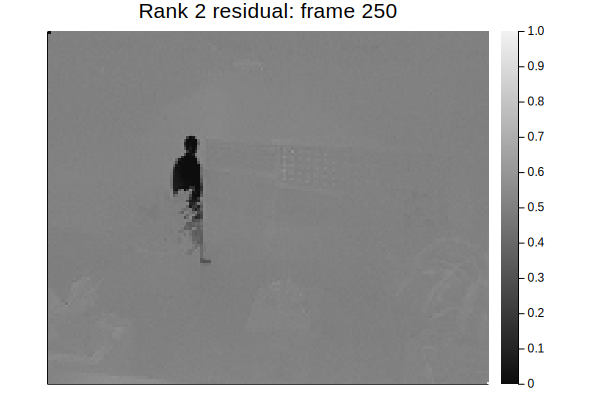

In [72]:
# Rank k residual
plotframe(
    fg(MovMatResidual[:, :, frame]),
    title="Rank $k residual: frame $frame",
)

Setting $k = 2$ does indeed better capture the background than $k = 1$. Paticularly we are better able to capture the on-off-on behavior of the row of lights in the front. As before, the people have been removed in the low rank approximation and instead appear in the residual matrix. The movie in the next cell shows that this is true for all the frames.  

In [73]:
println("Original movie vs Rank $k approximation vs Residual")
playvideo(
    [bg(MovMat), bg(MovMatk), fg(MovMatResidual)],
    ["Original movie", "Rank $k approximation", "Residual"]
)

Original movie vs Rank 2 approximation vs Residual


(div { style=Dict("display"=>"flex","flex-direction"=>"column") }
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (WebIO.Widget("context-21", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_11", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_12", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"Original movie\",3,val,650)})")]))):
      (button { id="button" events=Dict("click"=>WebIO.JSString("(function (){var tnorm=function set_play(name, nvideos, fps, nframes, init, callback){\n    var video;\n    var button = document.getElementById(\"button\");\n\n    for(var i = 1; i <= nvideos; i++){\n        video = document.getElementById(name + i);\n        if(video.paused){\n            video.play();\n            if(!init){\n                if(i == 1 && !init){\n                    video.addEventListener('ended', callback);\n                }\n                var new_rate = (video.duration / nframes) / (1.0 / fps);\n                video.playbackRate = new_rate;\n            }\n            button.textContent = \" ⏸ \";\n\n        }else{\n            video.pause();\n            button.textContent = \" ▶ \";\n        }\n    }\n    return video.currentTime / video.duration;\n}\n(\"Original movie\",3,24,650,WebIO.getval({\"name\":\"initialized\",\"id\":\"ob_12\",\"context\":\"context-21\",\"type\":\"observable\"}),(function (){var button=document.getElementById(\"button\"); button.textContent=\" ▶ \"; return WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_11\",\"context\":\"context-21\",\"type\":\"observable\"},1)})); WebIO.setval({\"name\":\"initialized\",\"id\":\"ob_12\",\"context\":\"context-21\",\"type\":\"observable\"},false); WebIO.setval({\"name\":\"timestep\",\"id\":\"ob_11\",\"context\":\"context-21\",\"type\":\"observable\"},Math.round((650*tnorm))); return })")) }
        " ▶ "))
    (div { style=Dict(:padding=>"0.5em",:width=>"400px") }
      (div)))
  (div { style=Dict("display"=>"flex","flex-direction"=>"row") }
    (div { style=Dict(:outline=>"1px solid #555",:padding=>"0.5em") }
      (div { style=Dict("display"=>"flex","flex-direction"=>"column") }
        (div
          "Original movie")
        (div { style=Dict(:width=>"500") }
          (WebIO.Widget("context-21", Channel{Any}(sz_max:32,sz_curr:0), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("timestep", (Observables.Observable{Int64}("ob_11", 1, Any[identity, WebIO.Backedge(WebIO.Widget(#= circular reference @-7 =#), WebIO.Backedge(WebIO.Widget(#= circular reference @-8 =#), WebIO.#34))]), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("initialized", (Observables.Observable{Bool}("ob_12", false, Any[]), nothing))), Any[], Dict{Any,Any}(Pair{Any,Any}("timestep", Any[WebIO.JSString("(function (val){return function set_time(name, nvideos, val, nframes){\n    for(var i = 1; i <= nvideos; i++){\n        var video = document.getElementById(name + i);\n        var t = (val / nframes) * video.duration;\n        video.currentTime = t;\n    }\n    return;\n}\n(\"Original movie\",3,val,650)})")]))):
            (video { attributes=Dict{Any,Any}(Pair{Any,Any}(:width, "100%")) id="Original movie1" }
              (source { attributes=Dict(:src=>"data:video/mp4;base64,AAA

Let us look at the top two right singular vectors using the command in the next cell. 

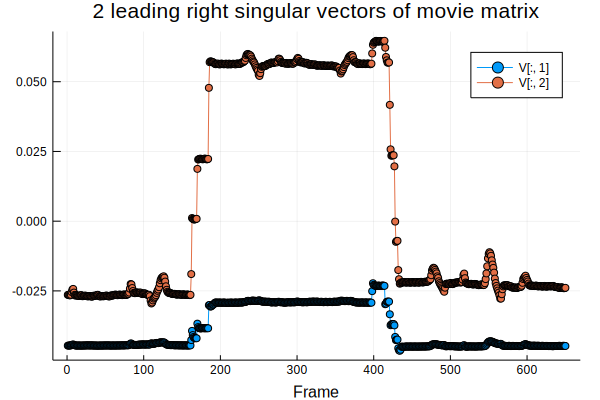

In [74]:
plot(
    V,
    label=["V[:, $i]" for i in collect(1:k)'],
    title="$k leading right singular vectors of movie matrix", 
    xaxis="Frame",
    marker=:circle, 
)

Notice the step function like behavior in the singular vectors! The elements of both the first and second singular vectors  jump up (or down) at around index 195 and back (or up) at around index 420.

These time instances correspond to the portions of the movie where the front lights lights go from on to off and then from off to on. We verify this observation using by slicing through the video around these frames as in the next cell. 

Interact.Options{:ToggleButtons,Int64}(23: "input-7" = 150 Int64 , "frame", 150, "150", 1, Interact.OptionDict(DataStructures.OrderedDict("150"=>150,"196"=>196,"300"=>300,"420"=>420,"500"=>500), Dict(420=>"420",500=>"500",150=>"150",196=>"196",300=>"300")), Any[], Any[], true, "horizontal", true)

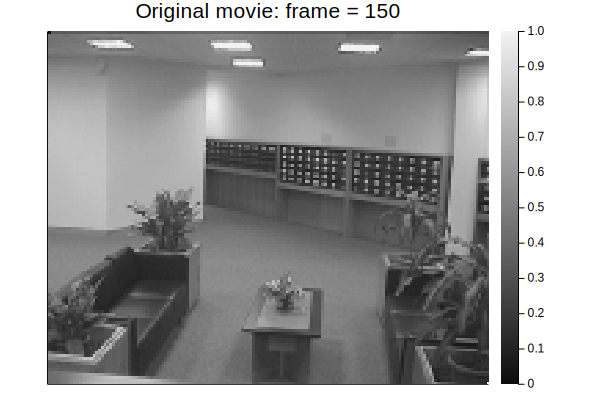

In [75]:
@manipulate for frame = [150, 196, 300, 420, 500] 
    plotframe(
        bg(MovMat[:, :, frame]),
        title = "Original movie: frame = $frame",
    )
end

# Change frame to view different frames

## The low-rank matrix hiding inside the video

There are two main things happening in the video that can be captured via a low-rank matrix.


Let $X_1$ represent the 128 x 160 matrix (or image) corresponding to what the room looks like when only the middle light in the background  is on and the four lights in the foreground are  off. Let $x_1$ denote the vector formed by reshaping $X_1$ into a 128 x 160 dimensional vector. 

Let $X_2$ reprsent the 128 x 160 matrix corresponding to what the room looks like when only the four lights in the forgeround are off. Let $x_2$ denote the vector formed by reshaping $X_2$ into a 128 x 160 dimensional vector. 


Let $B_t$ denote the 128 x 160 matrix corresponding to the background at time instance $t$. 

Then assuming a linear illumination model, we can express $B_t$ as

\begin{equation}\label{eq:mixing model}
 B_t = y_{1t} X_1 + y_{2t} X_2,
 \end{equation}

where $y_{1t}$ denotes the relative intensity of the middle light in the background and $y_{2t}$ denotes the relative intensity of the foreground row of four lights. If $y_{1t} = 0$ then only the lights in the foreground are on, whereas  if $y_{2t} = 0$ then only the light in the background is on.


Let $b_t$ denote the vector formed by reshaping $B_t$ into a 128 x 160 vector.

Then from Eq. (\ref{eq:mixing model}) we have that
$$
b_t = y_{1t} x_1 + y_{2t} x_2 = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} y_{1t} \\ y_{2t} \end{bmatrix}.$$

Let $B$ denote the $mn \times T$ matrix formed by stacking $b_1, \ldots, b_T$  alongside each other. Then 

$$ B = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} y_{11}  & \ldots & y_{1T} \\ y_{21}  & \ldots & y_{2T} \end{bmatrix} = x_1 y_{1}^T + x_2 y_{2}^T,$$

where $y_1$ and $y_2$ are $T$ dimensional vectors defined as 

$$ y_1 = \begin{bmatrix} y_{11} & \ldots & y_{1T} \end{bmatrix}^T,$$

and

$$ y_2 = \begin{bmatrix} y_{21} & \ldots & y_{2T} \end{bmatrix}^T,$$

The final step in uncovering this rank 2 background scene matrix hidden inside the video is assigning (relative) values to the elements of $y_1$ and $y_2$  so we can capture the dynamics of how the light(s) switch on or off. 